# Esercizio 1

**La legge dei grandi numeri**

In [2]:
# Scriviamo una funzione che simula il lancio di una moneta N volte e restituisce la frequenza di volte che è uscita testa
import random

def lancio_moneta(N):
    """
    Parametri:
        N (int): numero di lanci
    
    Output:
        frequenza (float): frequenza in percentuale
    """ 
    results = [random.randint(0,1) for x in range(N)]
    head_number = results.count(1)

    return (head_number / N) * 100

N = int(input("Inserire numero di lanci: "))
print("Provvedo alla simulazione...")
print(f"Frequenza relativa: {round(lancio_moneta(N),2)}%")

Provvedo alla simulazione...
Frequenza relativa: 20.0%


In [ ]:
# Calcoliamo la frequenza con la grandezza del campione che varia 100 volte da 10 a 20000

# Creiamo una lista di 100 elementi con il range di numero di lanci che varia
simulation_throw_1 = [random.randint(10,1000) for x in range(100)]
simulation_throw_1.sort()
print(simulation_throw_1)
simulation_throw_2 = [random.randint(10,5000) for x in range(100)]
simulation_throw_2.sort()
simulation_throw_3 = [random.randint(10,10000) for x in range(100)]
simulation_throw_3.sort()
simulation_throw_4 = [random.randint(10,20000) for x in range(100)]
simulation_throw_4.sort()

# Troviamo le frequenze delle liste definite precedentemente
frequency_1 = [lancio_moneta(x) for x in simulation_throw_1]
frequency_2 = [lancio_moneta(x) for x in simulation_throw_2]
frequency_3 = [lancio_moneta(x) for x in simulation_throw_3]
frequency_4 = [lancio_moneta(x) for x in simulation_throw_4]

[22, 30, 46, 47, 54, 63, 65, 65, 78, 82, 91, 93, 94, 97, 108, 115, 120, 133, 138, 173, 183, 184, 185, 191, 223, 231, 236, 239, 247, 251, 262, 267, 267, 271, 286, 287, 301, 305, 306, 315, 345, 363, 366, 374, 377, 405, 427, 435, 437, 438, 451, 461, 490, 522, 532, 541, 551, 554, 575, 595, 598, 601, 605, 623, 666, 667, 668, 715, 716, 733, 739, 740, 747, 791, 792, 803, 810, 820, 834, 837, 857, 881, 891, 891, 892, 904, 905, 908, 910, 911, 920, 925, 945, 953, 961, 964, 966, 971, 971, 984]


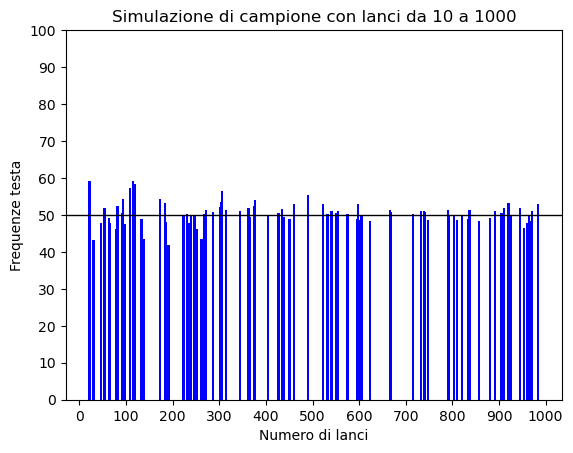

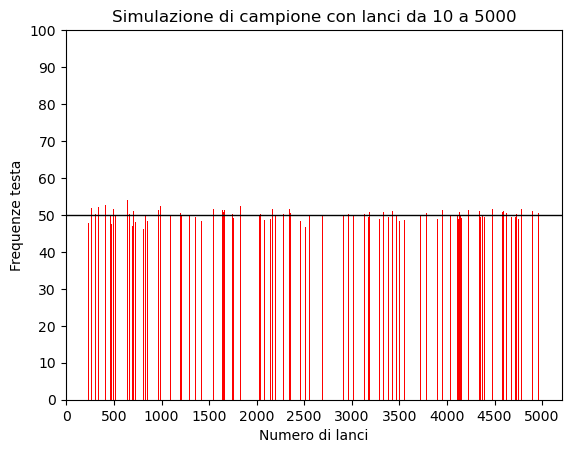

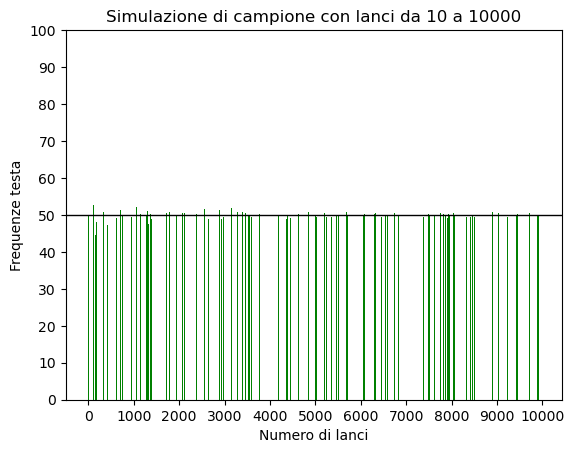

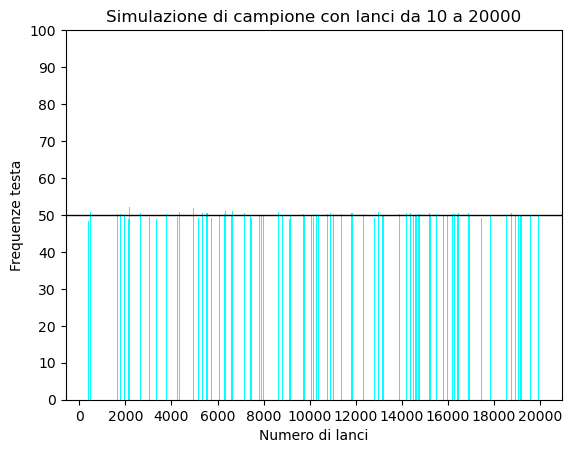

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Primo campione
plt.bar(simulation_throw_1,frequency_1, width=5, color = ['blue'])
plt.title("Simulazione di campione con lanci da 10 a 1000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,1001,100)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Secondo campione
plt.bar(simulation_throw_2,frequency_2, width=10, color = ['red'])
plt.title("Simulazione di campione con lanci da 10 a 5000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,5001,500)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Terzo campione
plt.bar(simulation_throw_3,frequency_3, width=20, color = ['green'])
plt.title("Simulazione di campione con lanci da 10 a 10000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,10001,1000)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Quarto campione
plt.bar(simulation_throw_4,frequency_4, width=40, color = ['cyan'])
plt.title("Simulazione di campione con lanci da 10 a 20000")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenze testa")
ticks = np.arange(0,20001,2000)
plt.xticks(ticks)
plt.yticks(np.arange(0,101,10))
plt.axhline(y=50, color='black', linestyle='-', linewidth=1)
plt.show()

# Notiamo che più si alza il numero di lanci più la percentuale di uscita di testa si posiziona sul 50%


# Esercizio 2


**Analisi del Dataset Titanic**

In [84]:
# Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
# Contiamo le righe e le colonne del dataset
print(f"Il Dataset ha {len(df)} righe e {len(df.columns)} colonne")

# Creiamo un indice sulle colonen
c_index = df.columns

# Per ogni colonna contiamo il numero di righe senza valori mancanti e lo sottraiamo al totale delle righe
for column in c_index:
    NaN_counter = len(df) - len(df[df[column].notna()])
    print(f"La colonna '{column}' ha {NaN_counter} valori mancanti")

Il Dataset ha 891 righe e 12 colonne
La colonna 'PassengerId' ha 0 valori mancanti
La colonna 'Survived' ha 0 valori mancanti
La colonna 'Pclass' ha 0 valori mancanti
La colonna 'Name' ha 0 valori mancanti
La colonna 'Sex' ha 0 valori mancanti
La colonna 'Age' ha 177 valori mancanti
La colonna 'SibSp' ha 0 valori mancanti
La colonna 'Parch' ha 0 valori mancanti
La colonna 'Ticket' ha 0 valori mancanti
La colonna 'Fare' ha 0 valori mancanti
La colonna 'Cabin' ha 687 valori mancanti
La colonna 'Embarked' ha 2 valori mancanti


In [86]:
# Riempiamo i valori mancanti nella colonna 'Embarked' con il valore più frequente

# Calcoliamo il valore più frequente
most_frequent = df['Embarked'].mode()[0]

# Creiamo una lista booleana 
values = [df['Embarked'].notna()]

# Sostituiamo i valori False
for item in values:

    if item is False:
        item = most_frequent

# Sostituiamo nel Dataset
df.Embarked = most_frequent
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [87]:
# Rimuoviamo le righe dove il valore di 'Age' è mancante

# Creiamo una lista contenente gli indici dei valori NaN
NaN_index = df[df['Age'].isna()].index
original_lenght = len(df)

# Utilizziamo 'drop' con 'inplace=True' per rimuovere le righe nel databse originario
df.drop(NaN_index, axis=0,inplace=True)
new_lenght = len(df)

print(f"Numero di righe del database originario: {original_lenght}\nNumero di righe del nuovo database: {new_lenght}")

Numero di righe del database originario: 891
Numero di righe del nuovo database: 714
